这是来自IBM的样本数据集，记录了用户订购的服务、账户信息及人口学特征。希望通过预测用户行为来留住用户，可以分析所有相关的用户数据，开发出有针对性的留存方法。

In [1]:
import numpy as np
import pandas as pd

In [2]:
tcc = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
tcc.shape

(7043, 21)

In [3]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


上述信息info显示没有缺失值  但是真实的情况还是要根据业务实际分析

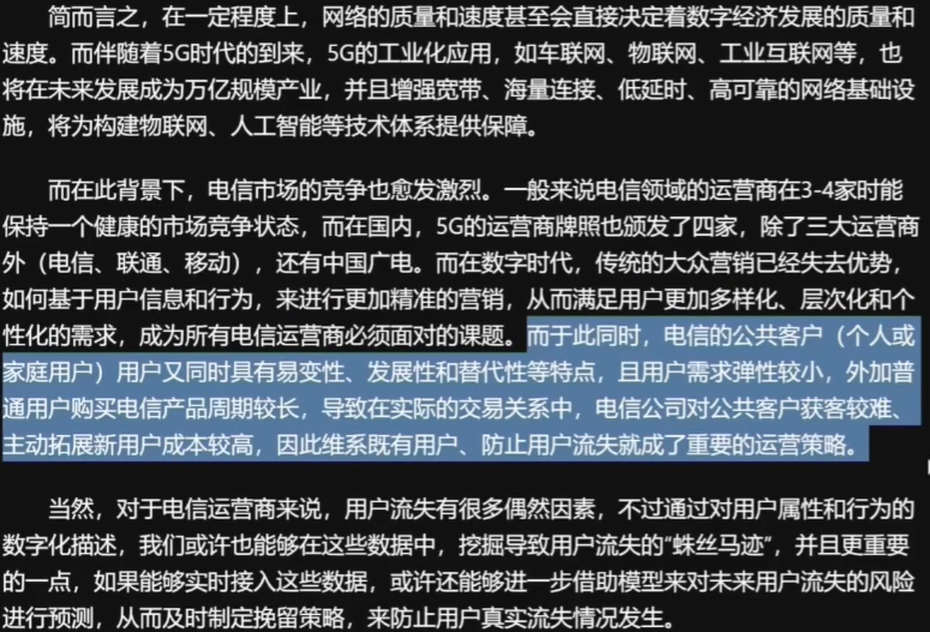

- 建模目标
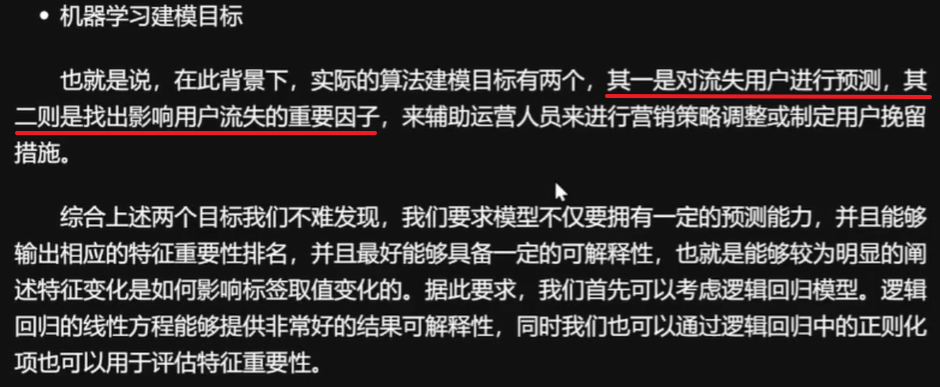
  

字段             
解释
customer       D
用户ID
ge           der
性别
SeniorC    tizen
是否是老年人(1代表是)          Partner
是否有配偶(Yes or No)
       ependents
是否经济独立(Yes or           No)
tenure
用户入网时间     
PhoneService
是否开通电话业务(Yes or No    
MultipleLines
是否开通多条电话业务(Yes、No or No phoneservice  
InternetService
是否开通互联网服务(No、DSL数字网络或filber potic光   网络)
OnlineSecurity
是否开通网络安全服务(Yes、No or No internet     ervice)
OnlineBackup
是否开通在线备份服务(Yes、No or No internetse vice)
DeviceProtection
是否开通设备保护服务(Yes、No or No int      rnetservice)
TechSupport
是否开通技术支持业务(Yes、No or No i      ternetservice)
StreamingTV
是否开通网络电视(
StreamingMovies  
是否开通网络电影(Yes、No or No internetservice)
Contra         t
合同签订方式(按月、按年或者两年)
PaperlessBil ing
是否开通电子账单(Yes or No)
Payment    ethod
付款方式(bank transfer、.credit card、electroni、 check、mailed check)
Monthl   Charges
月度费用
To     alC
arges            是否费用
Churn
是香流失(Yes or No)Yes、No or No internetservice)

同时，根据官方给出的数据集说明，上述字段基本可以分为三类，分别是
用户已注册的服务
信息
、用户账户信息
和用户人口统计信息，三类字段划分情况如下
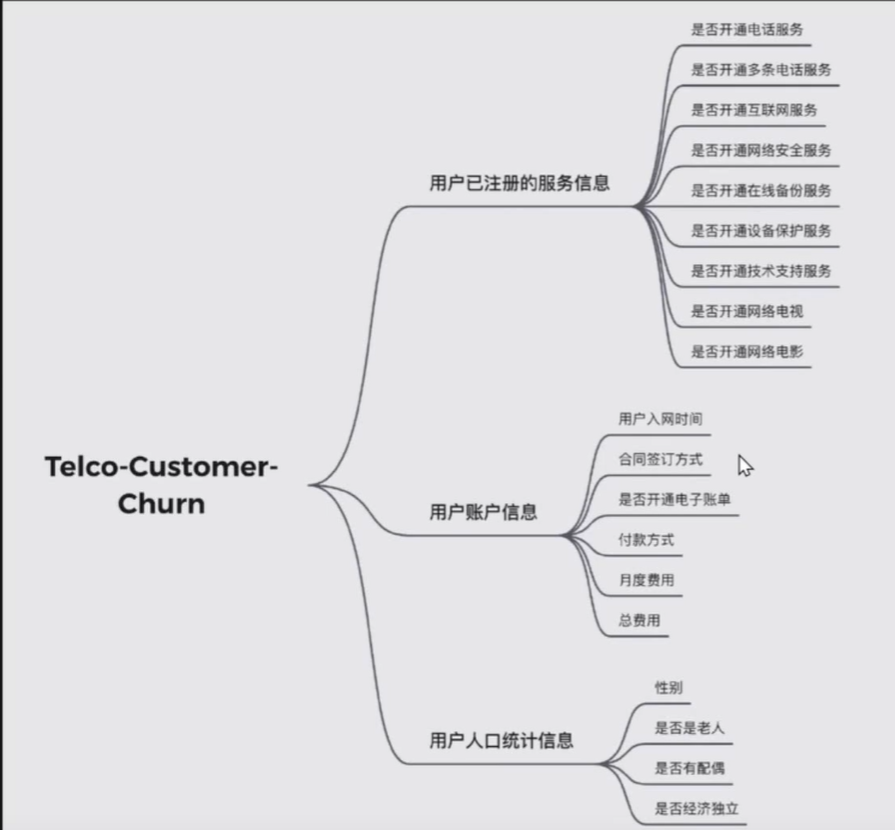：

In [5]:
# 用户 是否重复
tcc['customerID'].nunique()  == tcc.shape[0]

True

In [6]:
tcc.duplicated().sum() # id没有重复   则不会重复的两列

0

- 缺失性校验

In [7]:
tcc.isnull().sum() # 和tcc.info()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
tcc.isnull().count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

- 调整Dtype类型

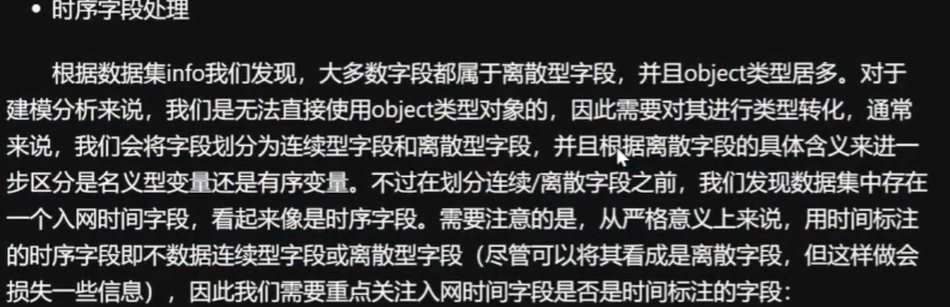

In [9]:
# 用户入网时间   查看
tcc['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

简单查看我们发现，该字段并不是典型的用年月日标注的时间字段，如2020-08-01，而是一
串连续的数值。当然，我们可以进一步查看该字段的取值范围：

In [10]:
tcc['tenure'].nunique()

73

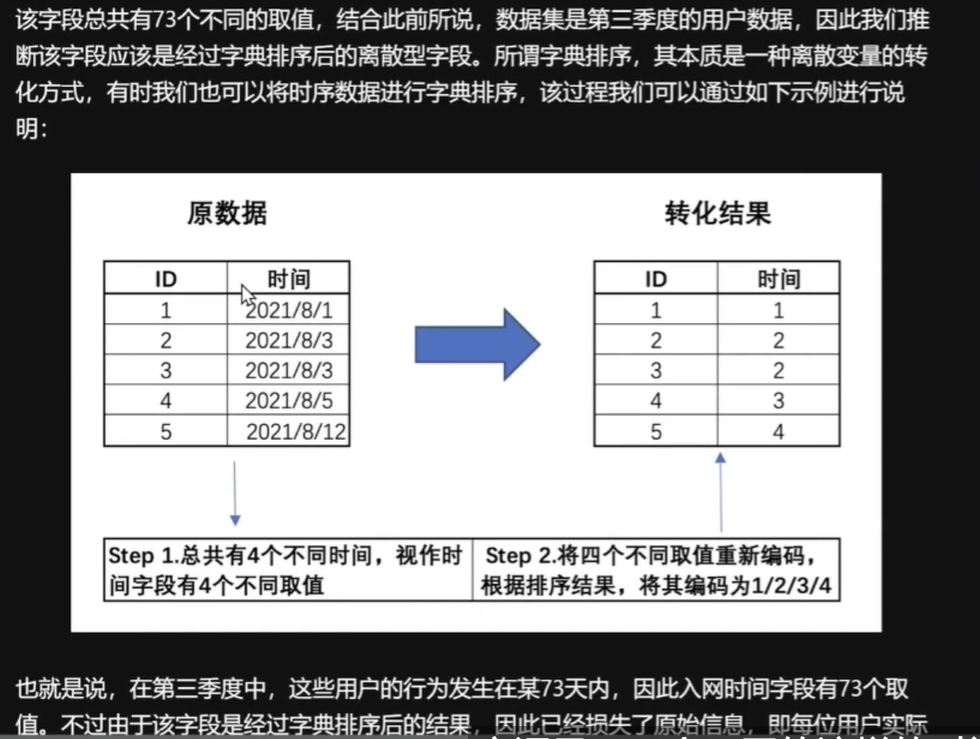
也就是说，在第三季度中，这些用户的行为发生在某73天内，因此入网时间字段有73个取
值。不过由于该字段是经过字典排序后的结果，因此已经损失了原始信息，即每位用户实际
的入网时间。而在实际的分析过程中，我们可以转化后的入网时间字段看成是离散变量，当
然也可以将其视作连续变量来进行分析，具体选择需要依据模型来决定。此处我们先将其视
作离散变量，后续根据情况来进行调整。

- 连续/离散变量标注

In [11]:
# 离散字段

# 离散字段
category_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']
 
# 连续字段
numeric_cols = ['MonthlyCharges', 'TotalCharges']
 
# 标签
target = 'Churn'
 
# 验证是否划分能完全   正确没有反应    错误会报错
assert len(category_cols) + len(numeric_cols) + 1 == tcc.shape[1]

In [12]:
tcc.select_dtypes('object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

然后，我们需要对不同类型字段进行转化。并且在此过程中，我们需要检验是否存在采用别
的值来表亓缺失值的情况。就像此前所说我们通过isnull只能检验出None(Python/原生对象)
和np.Nan(numpy/pandasi在读取数据文件时文件内部缺失对象的读取后表示形式象)对

-----------

但
此外我们还需要注意数据集中是否包含采用某符号表示缺失值的情况，例如某些时候可能使
用空格（其本质也是一种字符）来代替空格：

In [13]:
df= pd.DataFrame({'A':['Y',None,'N','N'],'B':[np.NaN,'','Y','N']})
df

,A,B
0,Y,NaN
1,None,
2,N,Y
3,N,N


In [14]:
df.isnull()

,A,B
0,False,True
1,True,False
2,False,False
3,False,False


但根据实际情况来看，空格可能确实是代表着数据采集时数据是缺失的，因此我们仍然需要
将其识别然后标记为缺失值，此时可以通过比较数据集各列的取值水平是否和既定的一致来
进行检查。例如，对于上述d数据集来说，特征A和B默认情况只有Y和N两种取值，而B列由
于通过空格表示了缺失值，因此用nuniquei查看数据集的话，B列将出现3种取值：

In [15]:
df.nunique()

A    2
B    3
dtype: int64

In [16]:
df['B'].explode().value_counts().to_dict()

{'': 1, 'Y': 1, 'N': 1}

In [34]:
df2= pd.DataFrame({'A':['Y',None,'N','N'],'B':[None,None,5,6]})
df2

,A,B
0,Y,NaN
1,None,NaN
2,N,5.0
3,N,6.0


In [35]:
df2['B'].astype(float)

0    NaN
1    NaN
2    5.0
3    6.0
Name: B, dtype: float64

----------------------------------

In [17]:
tcc[category_cols].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [18]:
for feature in tcc[category_cols]:
        print(f'{feature}: {tcc[feature].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

需要注意的是，如果是连续变量，则无法使用上述方法进行检验（取值水平较多），但由于
往往我们需要将其转化为数值型变量再进行分析，因此对于连续变量是否存在其他值表示缺
失值的情况，我们也可以观察转化情况来判别，例如如果是用空格代表缺失值，则无法直接
使用astype来转化成数值类型。

In [19]:
tcc[numeric_cols].astype(float)
 
ValueError: could not convert string to float: ''

SyntaxError: invalid syntax (2667045855.py, line 3)

根据上述报错信息可知 月费用 和总费用   存在可疑的数据  例如 上述描述的空格或者字符串

In [20]:
# 发现在连续特征中存在空格。
# 则此时我们需要进一步检查空格字符出现在哪一列的哪个位置，
# 我们可以通过如下函数来进行检验：
def find_index(data_col, val):
    """
    查询某值在某列中第一次出现位置的索引，没有则返回-1
    
    :param data_col: 查询的列
    :param val: 具体取值
    """
    val_list = [val]
    if data_col.isin(val_list).sum() == 0:
        index = -1
    else:
        index = data_col.isin(val_list).idxmax()# idxmax 方法将返回第一个匹配值的索引
    return index

In [21]:
# 查看空格第一次出现在哪一列的哪个位置：
for col in numeric_cols:
    print(find_index(tcc[col], ' '))

-1
488


In [22]:
# -1  代表月费用是没有问题的     488  代表总费用是有问题  且是空值
tcc["TotalCharges"][480:490]

480     225.75
481       2145
482     1671.6
483     8003.8
484     680.05
485    6130.85
486       1415
487    6201.95
488           
489      74.35
Name: TotalCharges, dtype: object

In [23]:
tcc["TotalCharges"].iloc[488]

' '

In [24]:
tcc["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

接下来使用np.nanj对空格进行替换，并将'MonthlyCharges'转化为浮点数类型：

In [38]:
tcc['TotalCharges']=tcc['TotalCharges'].apply(lambda x: x if x != ' ' else np.nan).astype(float)
tcc['MonthlyCharges']=tcc['MonthlyCharges'].astype(float)

In [41]:
def missing (df):
    """
    计算每一列的缺失值及占比
    """
    missing_number = df.isnull().sum().sort_values(ascending=False)              # 每一列的缺失值求和后降序排序                  
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)          # 每一列缺失值占比
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])      # 合并为一个DataFrame
    return missing_values
 
missing(tcc[numeric_cols])

,Missing_Number,Missing_Percent
TotalCharges,11,0.001562
MonthlyCharges,0,0.000000


missing(tcc[numeric_cols])  中  Missing_Number	对应的结果和tcc["TotalCharges"].value_counts()是一样的

- 缺失值填补

In [45]:
tcc["TotalCharges"].isnull().sum()

11

In [48]:
# 输出缺失值位置对应的索引
tcc.index[tcc["TotalCharges"].isnull()].tolist()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [65]:
tcc[tcc["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


我们发现，这11条数据的入网时间都是0，也就是说，这11位用户极有可能是在统计周期结
束前的最后时间入网的用户，因此没有过去的总消费记录，但是却有当月的消费记录。也就
是说，该数据集的过去总消费记录不包括当月消费【因为是第三季度的记录 就是 9 月份入网  78月份没有记录】记录，也就是不存在过去总消费记录等于
0的记录。我们可以简单验证：

In [68]:
(tcc["TotalCharges"]==0).sum()

0

In [71]:
tcc["TotalCharges"].mean()

2279.7343035638223

In [69]:
tcc["TotalCharges"]=tcc["TotalCharges"].fillna(0)

In [70]:
tcc["TotalCharges"].iloc[488]

0.0

- 异常值检验
  往往是连续型变量
  - 三倍标准差法 / 箱线图

In [98]:
tcc[numeric_cols].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


此外还有另一种便捷的方式，即直接使用pd.to_numericx对连续变量进行转化，并在errors参
数位上输入'coerce'参数，表示能直接转化为数值类型时直接转化，无法转化的用缺失值填
补，过程如下：

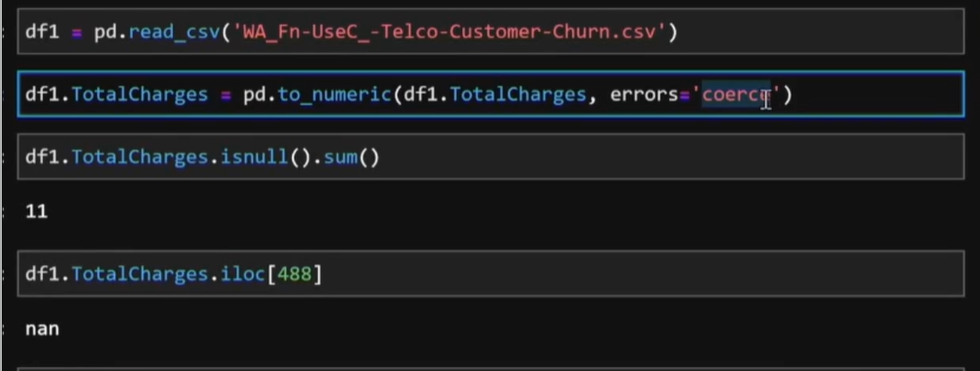

In [96]:
tcc['MonthlyCharges'].mean()+3*tcc['MonthlyCharges'].std()# 上界限

155.03183375363466

In [97]:
tcc['MonthlyCharges'].mean()-3*tcc['MonthlyCharges'].std()# 下界

-25.5084488324363

In [99]:
tcc['TotalCharges'].mean()+3*tcc['TotalCharges'].std(),tcc['TotalCharges'].mean()-3*tcc['TotalCharges'].std()

(9080.117712630887, -4520.649105503242)

此外，我们还可以通过箱线图来进行异常值点的识别，和3倍标准差法利用均值和方差
进行计算不同，箱线图主要借助中位数和四分位数来进行计算，以上四分位数+1.5倍四分位
距为上界、下四分位数-1.5倍四分位距为下界，超出界限则认为是异常值。我们可以借助
plt.boxplot绘图函数迅速绘制箱线图来观察异常值点情况：

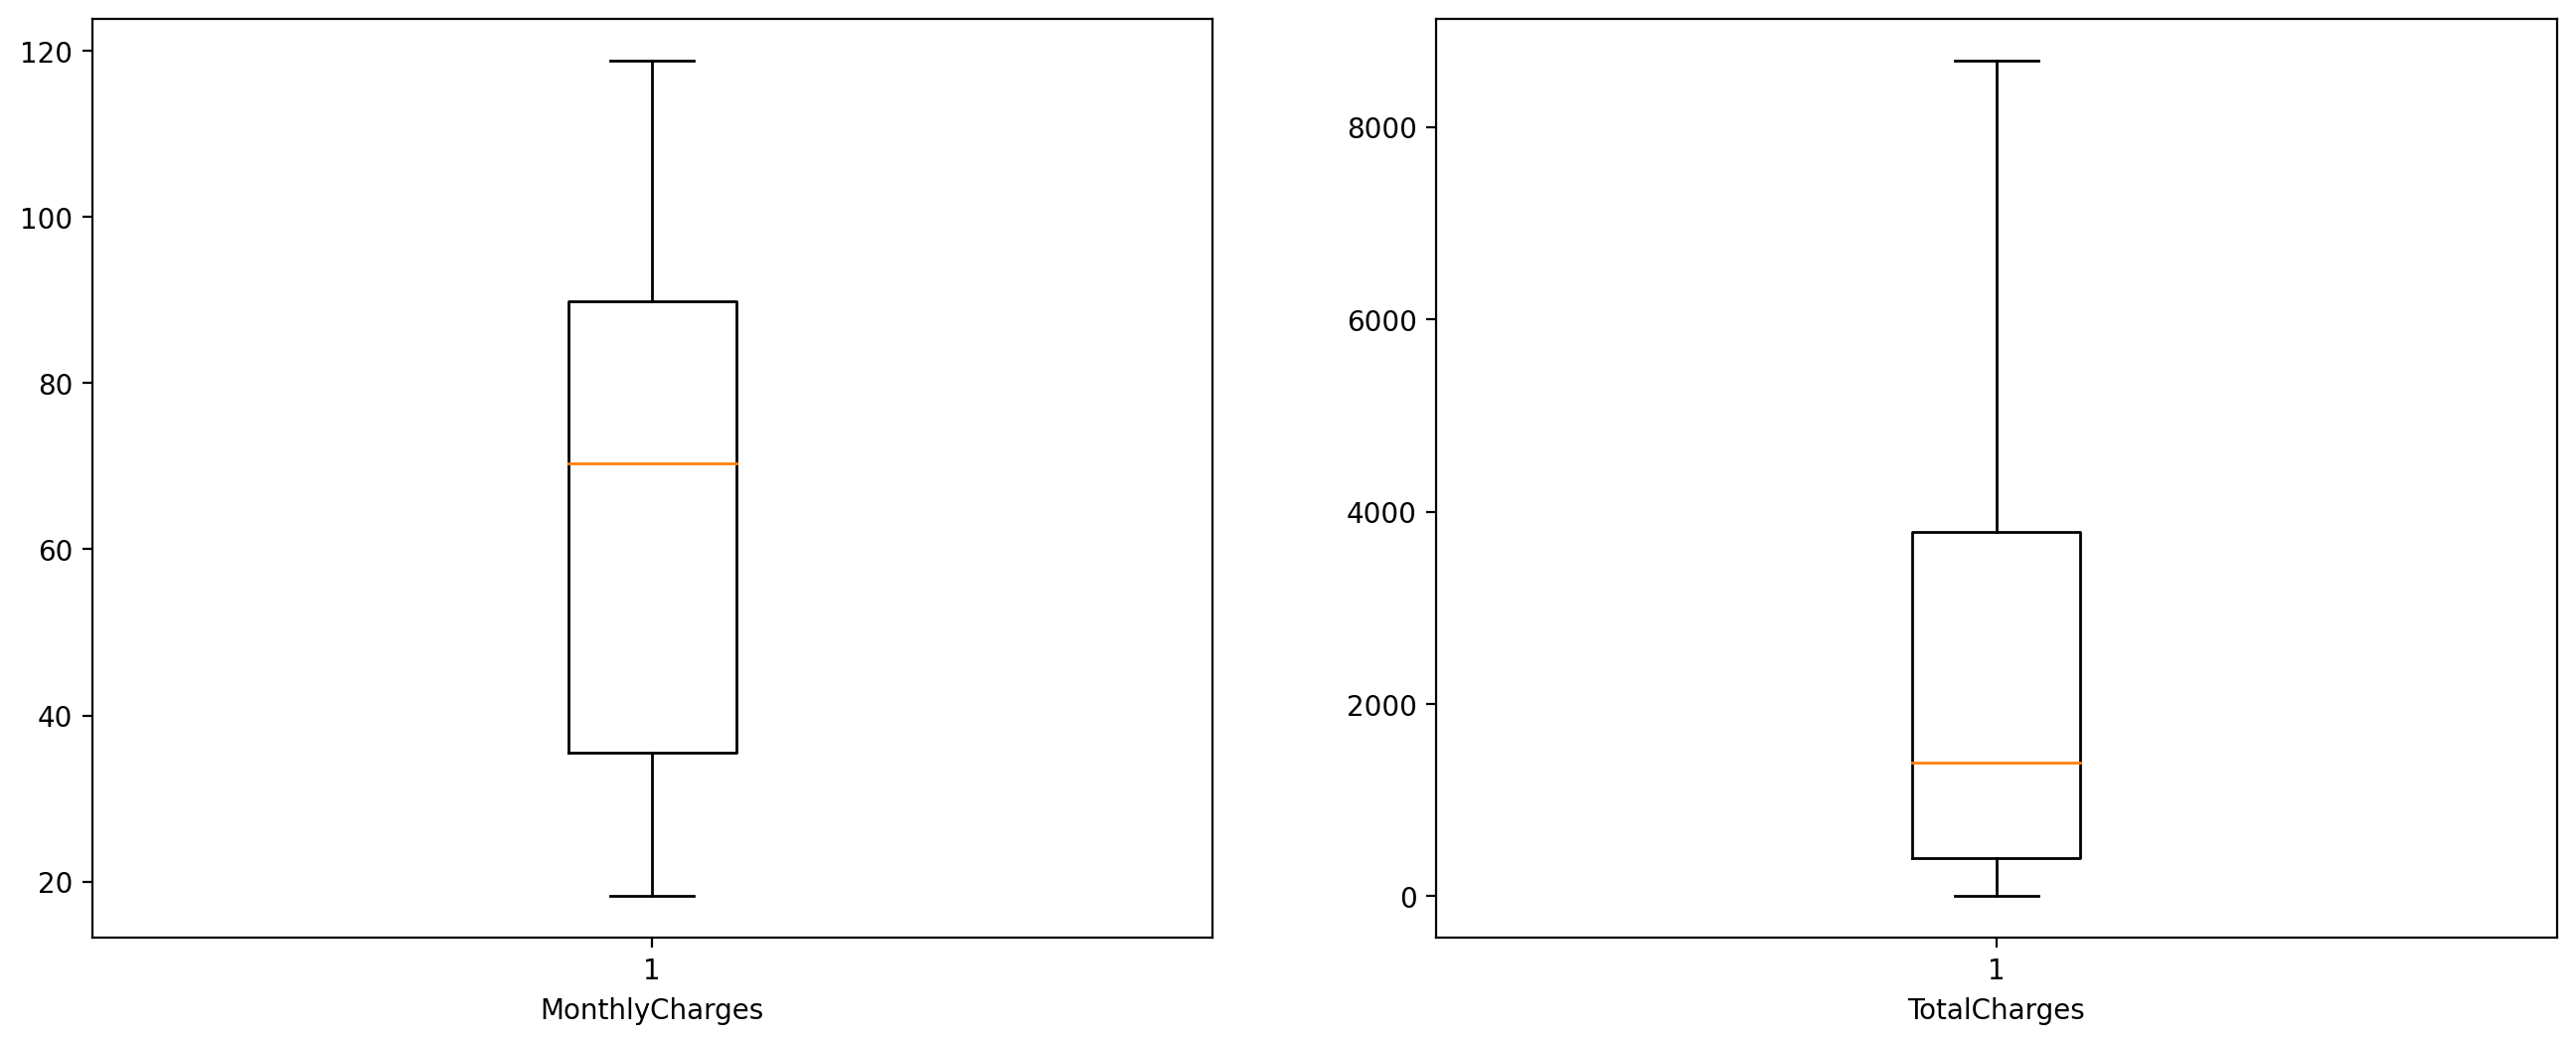

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
plt.boxplot(tcc['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.subplot(122)
plt.boxplot(tcc['TotalCharges'])
plt.xlabel('TotalCharges')
plt.show()

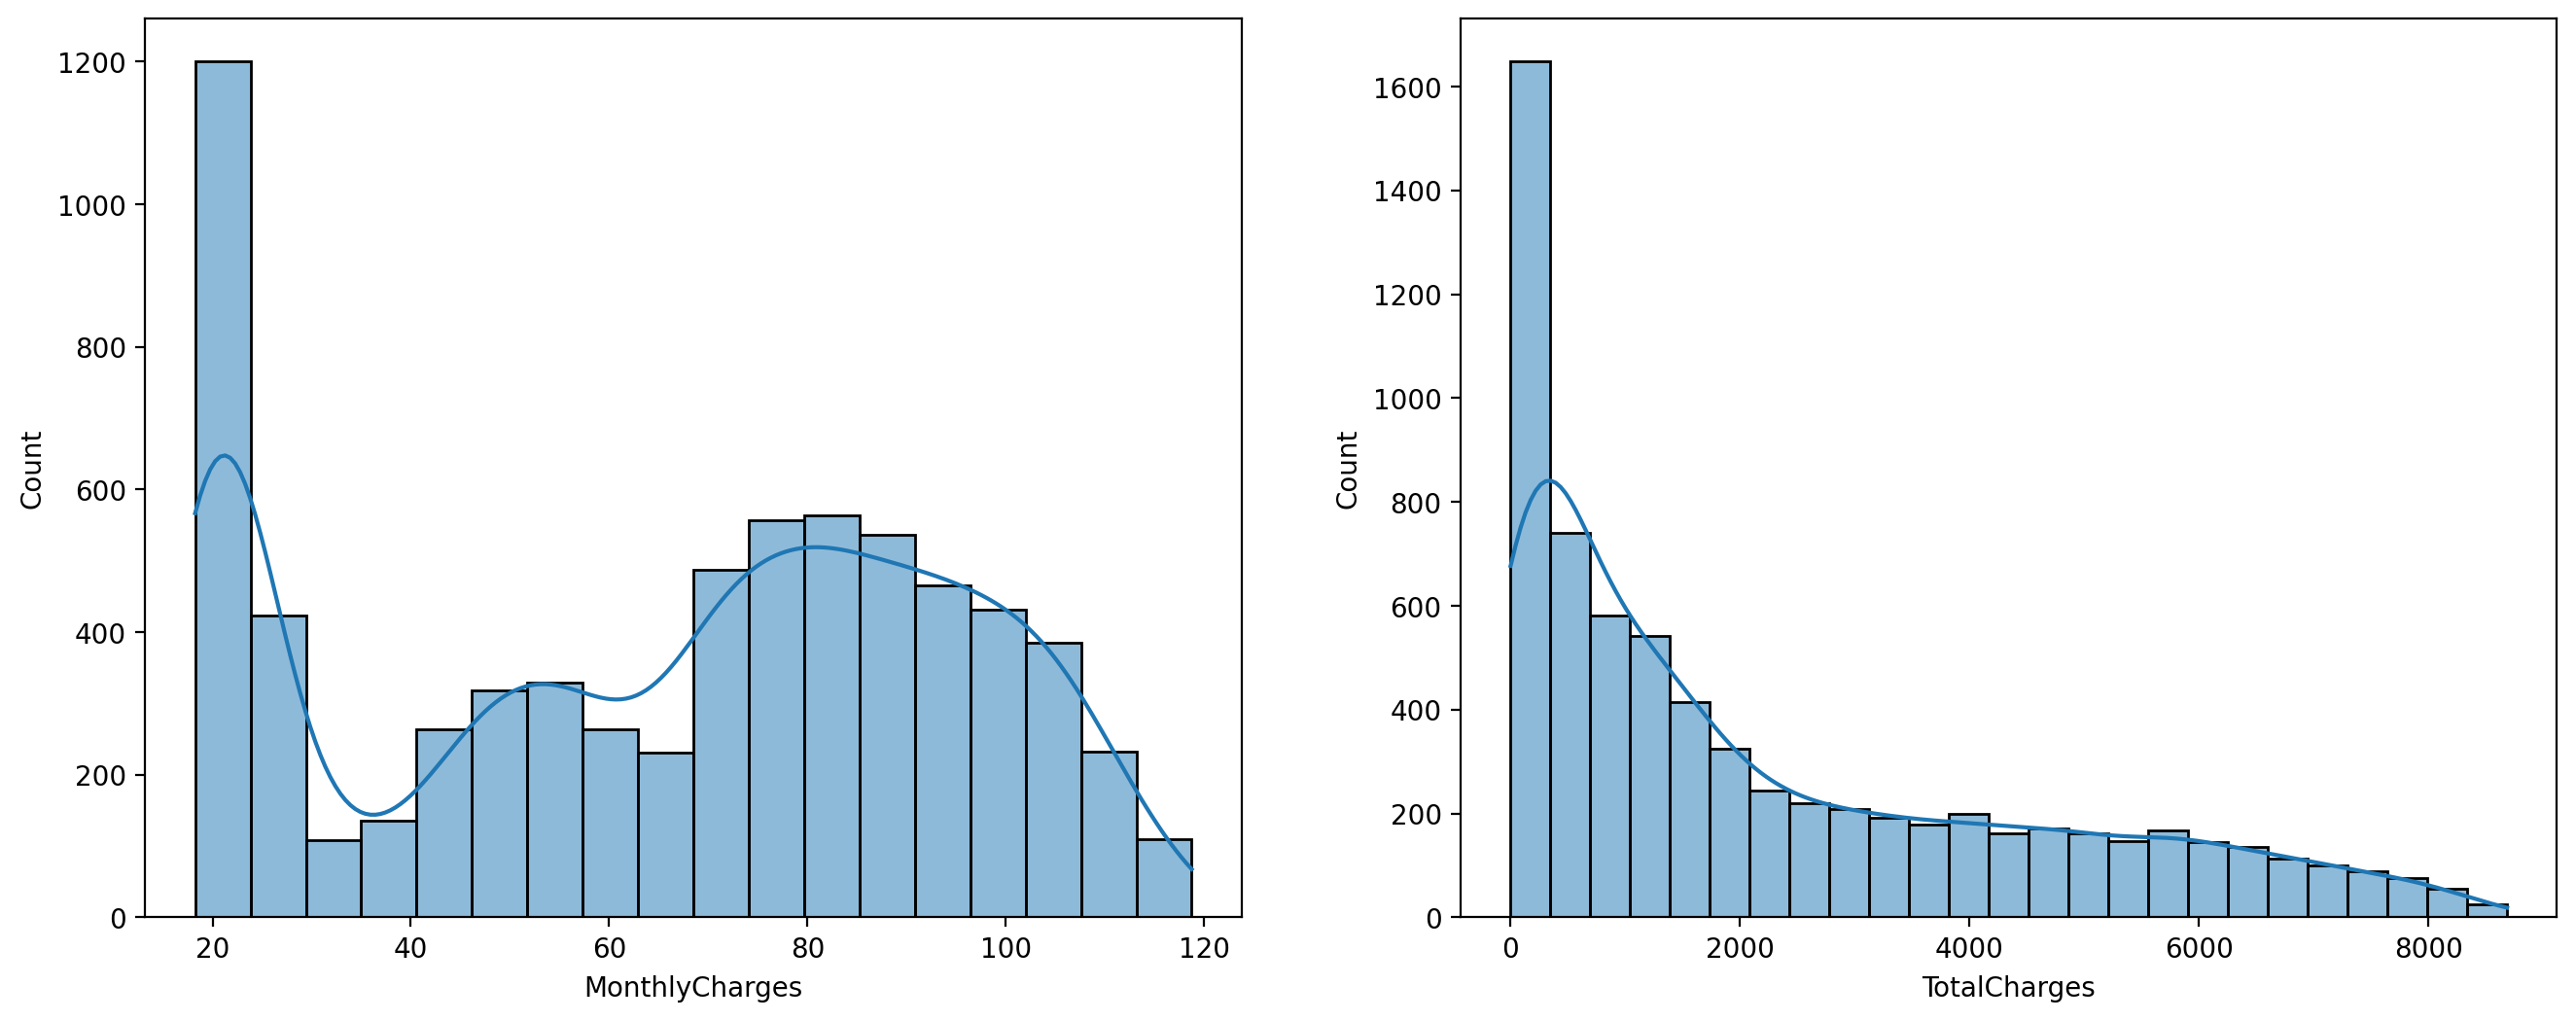

In [102]:
import seaborn as sns
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
sns.histplot(tcc['MonthlyCharges'], kde=True) 
plt.subplot(122)
sns.histplot(tcc['TotalCharges'], kde=True)
plt.show()

In [73]:
tcc['TotalCharges'].dtypes

dtype('float64')

##  相关性分析

In [103]:
y = tcc['Churn']
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customer)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customer)')


Percentage of Churn:  26.54 %  --> (1869 customer)
Percentage of customer did not churn: 73.46  %  --> (5174 customer)


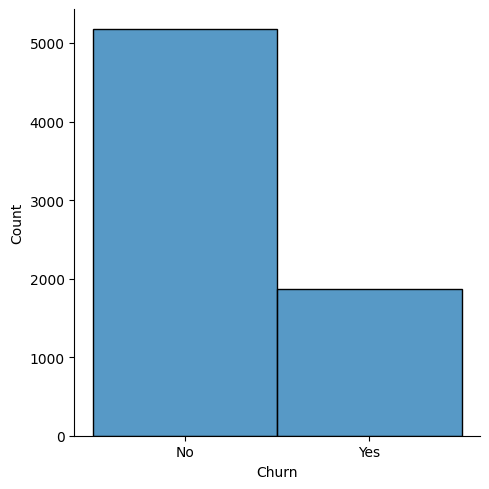

In [104]:
sns.displot(y)

In [110]:
y.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

2变量相关性分析

接下来，我们尝试对变量和标签进行相关性分析。从严格的统计学意义讲，不同类型变
量的相关性需要采用不同的分析方法，例如连续变量之间相关性可以使用皮尔逊相关系进
行

计算，而连续变量和离散变量之间相关性则可以卡方检验进行

分析，而离散变量之则可
以从信息增益角度入手进

行分析。但是，如果我们只是想初步探查变量之间是否存相关关
系，则可以忽略变量连续/离散特性，统一使用相关系数进行计算，这也是pandas中的corr
方法所采用的策略。

In [111]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [114]:
# 剔除ID列
df3 = tcc.iloc[:,1:].copy()
 
# 将标签Yes/No转化为1/0
df3['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df3['Churn'].replace(to_replace='No',  value=0, inplace=True)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [115]:
# 将其他所有分类变量转化为哑变量，连续变量保留不变
df_dummies = pd.get_dummies(df3)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [117]:
df3.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

此处需要注意pd.get dummies:会将非数值类型对象类型进行自动哑变量转化，而对数值类型
对象，无论是整型还是浮点型，都会保留原始列不变：

In [118]:
df_dummies[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']]

,Churn,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,1,2,53.85,108.15,0
3,0,45,42.30,1840.75,0
4,1,2,70.70,151.65,0
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [119]:
df_dummies.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

In [120]:
# 哑变量计算后  计算相关性矩阵
df_dummies.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,0.000080,-0.000080,-0.317504,0.317504,-0.062078,...,0.520122,-0.444255,0.170814,0.354481,-0.158574,0.158574,0.185987,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,0.000080,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.317504,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.317504,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,0.211185,-0.159712,0.113890,-0.062078,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071


当然，在所有的相关性中，我们较为关注特征和标签之间的相关关系，因此可以直接挑选标签列的相关系数计算结果，并进行降序排序：

In [121]:
df_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

根据相关系数计算的基本原理，相关系数为正数，则二者为正相关，数值变化会更倾向于保持同步。

例如Churn与Contract_Month-to-month相关系数为0.4，则说明二者存在一定的正相关性，即Contract_Month-to-month[按照月份进行合同签订]越有可能使得Churn取值为1。也就是在Contract字段的Month-to-month取值结果和最终流失的结果相关性较大，也就是相比其他条件，Contract取值为Month-to-month的用户流失概率较大，而tenure和Churn负相关，则说明tenure取值越大[入网时间越长]、用户流失概率越小。Contract_Two year[签订两年合同] 用户流失概率越小092

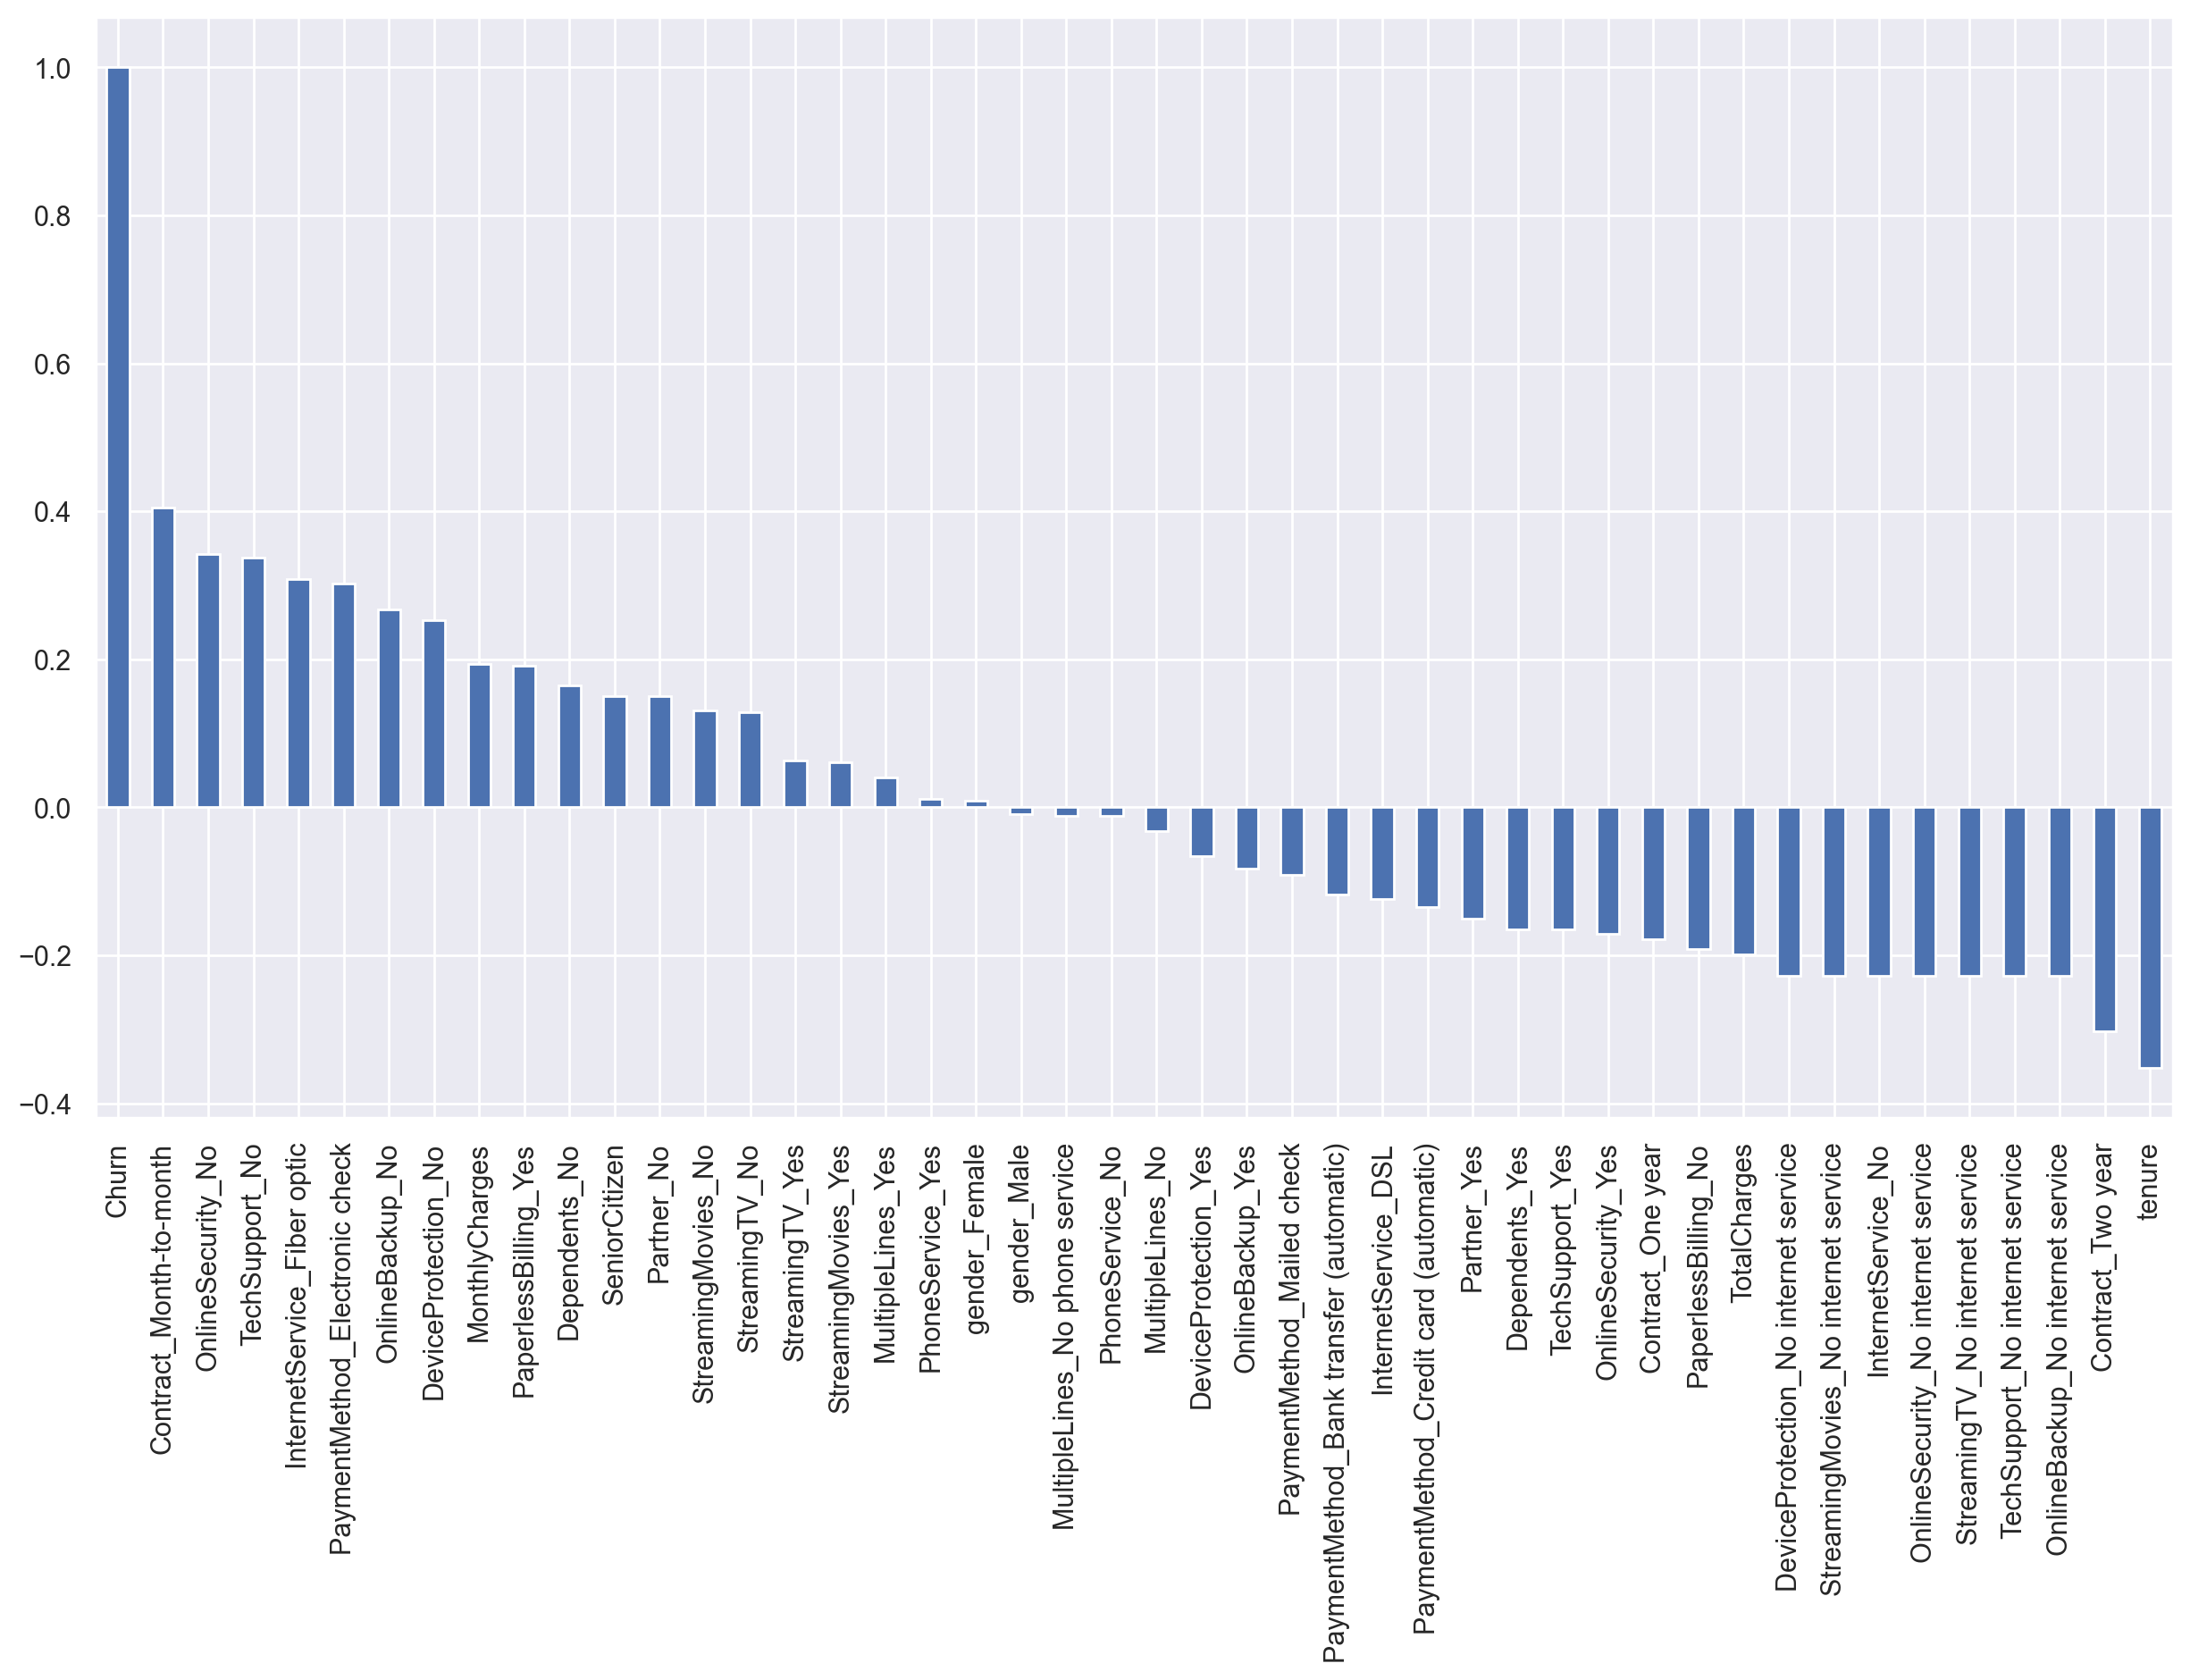

In [150]:
sns.set()# 设置 seaborn 的默认风格
plt.figure(figsize=(15,8), dpi=200)
 
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xticks(rotation= 90)
plt.show()

直接计算整体相关系数矩阵以及对整体相关性进行可视化展示是一种非常高效便捷的方式，在实际的算法竞赛中，我们也往往会采用上述方法快速的完成数据相关性检验和探索工作。不过，如果是对于业务分析人员，可能我们需要为其展示更为直观和具体的一些结果，才能有效帮助业务人员对相关性进行判别。

此时我们可以考虑围绕不同类型的属性进行柱状图的展示与分析。当然，此处需要对比不同字段不同取值下流失用户的占比情况，因此可以考虑使用柱状图的另一种变形：堆叠柱状图来进行可视化展示： 092

Rectangle(xy=(-0.4, 0), width=0.8, height=2549, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=2625, angle=0)
Rectangle(xy=(-0.4, 0), width=0.8, height=939, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=930, angle=0)
Rectangle(xy=(0, 0), width=0, height=0, angle=0)
Rectangle(xy=(0, 0), width=0, height=0, angle=0)


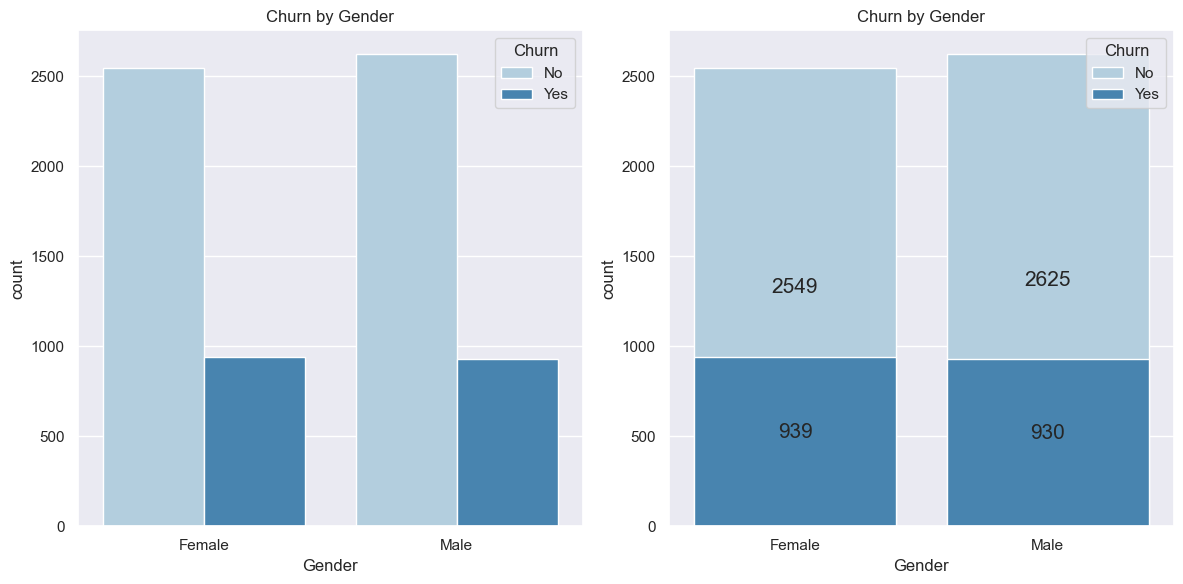

In [144]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi=100)#一行两列
 
# 柱状图
plt.subplot(121)
sns.countplot(x="gender",hue="Churn",data=tcc,palette="Blues", dodge=True)
plt.xlabel("Gender")
plt.title("Churn by Gender")
 
# 柱状堆叠图
plt.subplot(122)
sns.countplot(x="gender",hue="Churn",data=tcc,palette="Blues", dodge=False)
plt.xlabel("Gender")
plt.title("Churn by Gender")
patches = axes[1].patches
for patch in patches:
    print(patch)
    # 获取当前patch的x和y位置
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    # 根据patch的索引确定是堆叠图中的哪一部分
    if patch.get_label() == '_nolegend_'  :

        # 在柱子中间添加文本
        axes[1].text(x, y/2, '{}'.format(int(patch.get_height())), ha='center', va='bottom',fontsize=15 )

plt.tight_layout()
plt.show()